In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

In [2]:
Data=pd.read_csv('cricketers.csv')

In [3]:
Data.head()

,PLAYER matches_played innings_batted runs_scored highest_runs balls_faced average_runs strike_rate innings_bowled overs runs_given wickets_obtained average_runs_per_wicket bowling_economy
0,Aaron Finch\t10\t9\t134\t46\t100\t16.75\t144\t...
1,AB de Villiers\t12\t11\t480\t90\t275\t53.33\t1...
2,Abhishek Sharma\t3\t3\t63\t46\t33\t63\t190.9\t...
3,Ajinkya Rahane\t15\t14\t370\t65\t313\t28.46\t1...
4,Alex Hales\t6\t6\t148\t45\t118\t24.66\t125.42\...


In [4]:
new = Data.iloc[:,0].str.split("\t", n = 13, expand = True)

In [5]:
new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Aaron Finch,10,9,134,46,100,16.75,144,0,0,0,0,0,0
1,AB de Villiers,12,11,480,90,275,53.33,174.54,0,0,0,0,0,0
2,Abhishek Sharma,3,3,63,46,33,63,190.9,0,0,0,0,0,0
3,Ajinkya Rahane,15,14,370,65,313,28.46,118.21,0,0,0,0,0,0
4,Alex Hales,6,6,148,45,118,24.66,125.42,0,0,0,0,0,0


In [6]:
NewData = pd.DataFrame(columns = ['PLAYER','matches_played','innings_batted','runs_scored','highest_runs','balls_faced',
                            'average_runs','strike_rate','innings_bowled','overs','runs_given','wickets_obtained',
                            'average_runs_per_wicket','bowling_economy'])
NewData["PLAYER"] = new.iloc[:,0]
NewData["matches_played"] = new.iloc[:,1]
NewData["innings_batted"] = new.iloc[:,2]
NewData["runs_scored"] = new.iloc[:,3]
NewData["highest_runs"] = new.iloc[:,4]
NewData["balls_faced"] = new.iloc[:,5]
NewData["average_runs"] = new.iloc[:,6]
NewData["strike_rate"] = new.iloc[:,7]
NewData["innings_bowled"] = new.iloc[:,8]
NewData["overs"] = new.iloc[:,9]
NewData["runs_given"] = new.iloc[:,10]
NewData["wickets_obtained"] = new.iloc[:,11]
NewData["average_runs_per_wicket"] = new.iloc[:,12]
NewData["bowling_economy"] = new.iloc[:,13]

In [7]:
NewData.head()

,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,Aaron Finch,10,9,134,46,100,16.75,144,0,0,0,0,0,0
1,AB de Villiers,12,11,480,90,275,53.33,174.54,0,0,0,0,0,0
2,Abhishek Sharma,3,3,63,46,33,63,190.9,0,0,0,0,0,0
3,Ajinkya Rahane,15,14,370,65,313,28.46,118.21,0,0,0,0,0,0
4,Alex Hales,6,6,148,45,118,24.66,125.42,0,0,0,0,0,0


In [8]:
NewData.drop(["PLAYER"], axis = 1, inplace = True)

## Ans1. Normalized all the features of data set using min max scaler. It transformed data to range of 0 to 1.

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
NData = scaler.fit_transform(NewData)

C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [12]:
NData

array([[0.58823529, 0.52941176, 0.18231293, ..., 0.        , 0.        ,
        0.        ],
       [0.70588235, 0.64705882, 0.65306122, ..., 0.        , 0.        ,
        0.        ],
       [0.17647059, 0.17647059, 0.08571429, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.16666667, 0.53009259,
        0.63030303],
       [0.        , 0.        , 0.        , ..., 0.20833333, 0.21111111,
        0.61818182],
       [0.        , 0.        , 0.        , ..., 0.375     , 0.20777778,
        0.60848485]])

## Ans 2. K means implementation from scratch for column average_runs and bowling_economy.

In [13]:
# Taking the average_runs and bowling_economy columns in a array D. These are the selected features for clustering the data points.
D = NData[:,[5,12]]

In [14]:
# Number of sample records
m=D.shape[0]

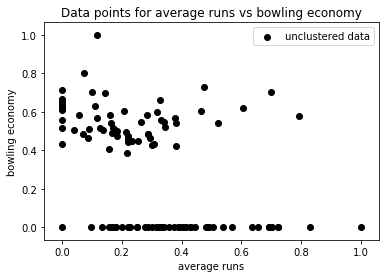

In [15]:
#Plotting the data
plt.scatter(D[:,0],D[:,1],c='black',label='unclustered data')
plt.xlabel('average runs')
plt.ylabel('bowling economy')
plt.legend()
plt.title('Data points for average runs vs bowling economy')
plt.show()

In [16]:
# Number of features
n = 2

In [17]:
# Maximum number of iteration for the convergence
n_iter=500

In [18]:
# Number of clusters
K = 2

In [19]:
import random as rd
#Initializing the centroids randomly from the data points
Centroids=np.array([]).reshape(n,0)

#Centroids is a n x K dimentional matrix, where each column will be a centroid for one cluster.
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,D[rand]]

In [20]:
Centroids

array([[0.50415403, 0.3753132 ],
       [0.        , 0.        ]])

In [21]:
#For each training example compute the euclidian distance from the centroid and assign the cluster based on the minimal distance.
#The output will be a dictionary with cluster number as Keys and the data points which belong to that cluster as values.
Output={}


In [22]:
#We iterate over n_iter and repeat the E-Step and M-Step, till the convergence is achieved.
#We find the euclidian distance from each point to all the centroids and store in a m X K matrix. 
#Every row in EuclidianDistance matrix will have distances of that particular data point from all the centroids.
#We then find the minimum distance and store the index of the column in a vector C.
#E-Step
for i in range(n_iter):
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((D-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    C=np.argmin(EuclidianDistance,axis=1)+1
#We regroup the data points based on the cluster index C and store in the Output dictionary and 
#also compute the mean of separated clusters and assign it as new centroids. 
#Y is a temporary dictionary which stores the solution for one particular iteration.
#M-Step
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for j in range(m):
        Y[C[j]]=np.c_[Y[C[j]],D[j]]
    for k in range(K):
        Y[k+1]=Y[k+1].T
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0)
    Output=Y

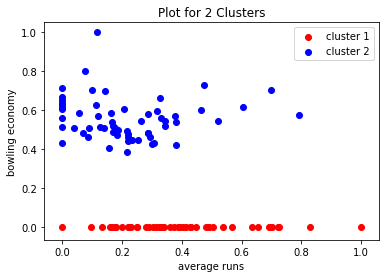

In [23]:
#Plotting the scatter plot for the two clusters.
color=['red','blue']
labels=['cluster 1','cluster 2']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.xlabel('average runs')
plt.ylabel('bowling economy')
plt.legend()
plt.title('Plot for 2 Clusters')
plt.show()

## Ans 3. Applying above K Means algorithm for different number of clusters 3,4,5.

In [24]:
# Number of clusters
K = 3
Centroids=np.array([]).reshape(n,0)
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,D[rand]]
Output={}
for i in range(n_iter):
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((D-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    C=np.argmin(EuclidianDistance,axis=1)+1
#We regroup the data points based on the cluster index C and store in the Output dictionary and 
#also compute the mean of separated clusters and assign it as new centroids. 
#Y is a temporary dictionary which stores the solution for one particular iteration.
#M-Step
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for j in range(m):
        Y[C[j]]=np.c_[Y[C[j]],D[j]]
    for k in range(K):
        Y[k+1]=Y[k+1].T
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0)
    Output=Y

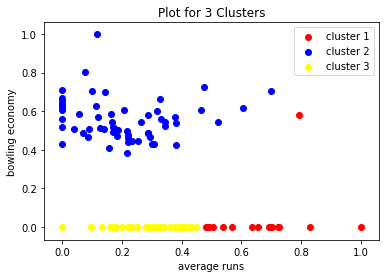

In [25]:
#Plotting the scatter plot for 3 clusters.
color=['red','blue', 'yellow']
labels=['cluster 1','cluster 2','cluster 3']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.xlabel('average runs')
plt.ylabel('bowling economy')
plt.legend()
plt.title('Plot for 3 Clusters')
plt.show()

In [26]:
# Number of clusters
K = 4
Centroids=np.array([]).reshape(n,0)
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,D[rand]]
Output={}
for i in range(n_iter):
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((D-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    C=np.argmin(EuclidianDistance,axis=1)+1
#We regroup the data points based on the cluster index C and store in the Output dictionary and 
#also compute the mean of separated clusters and assign it as new centroids. 
#Y is a temporary dictionary which stores the solution for one particular iteration.
#M-Step
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for j in range(m):
        Y[C[j]]=np.c_[Y[C[j]],D[j]]
    for k in range(K):
        Y[k+1]=Y[k+1].T
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0)
    Output=Y

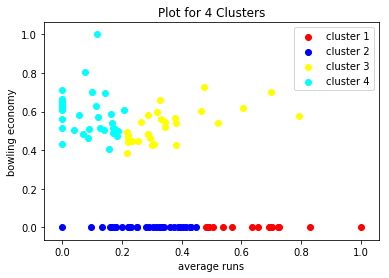

In [27]:
#Plotting the scatter plot for 4 clusters.
color=['red','blue', 'yellow', 'cyan']
labels=['cluster 1','cluster 2','cluster 3','cluster 4']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.xlabel('average runs')
plt.ylabel('bowling economy')
plt.legend()
plt.title('Plot for 4 Clusters')
plt.show()

In [28]:
# Number of clusters
K = 5
Centroids=np.array([]).reshape(n,0)
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,D[rand]]
Output={}
for i in range(n_iter):
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((D-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    C=np.argmin(EuclidianDistance,axis=1)+1
#We regroup the data points based on the cluster index C and store in the Output dictionary and 
#also compute the mean of separated clusters and assign it as new centroids. 
#Y is a temporary dictionary which stores the solution for one particular iteration.
#M-Step
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for j in range(m):
        Y[C[j]]=np.c_[Y[C[j]],D[j]]
    for k in range(K):
        Y[k+1]=Y[k+1].T
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0)
    Output=Y

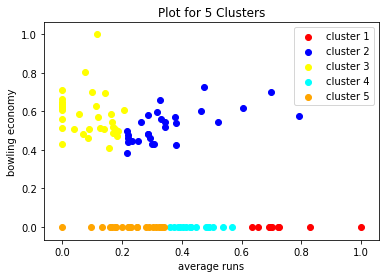

In [29]:
#Plotting the scatter plot for 5 clusters.
color=['red','blue', 'yellow', 'cyan','orange']
labels=['cluster 1','cluster 2','cluster 3','cluster 4','cluster 5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.xlabel('average runs')
plt.ylabel('bowling economy')
plt.legend()
plt.title('Plot for 5 Clusters')
plt.show()